<a href="https://colab.research.google.com/github/ArchanaDas13/machinelearning-series/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [ ]:
#loading the data into pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


CORRELATION
1.POSTIVE
2.NEGATIVE

In [ ]:
correlation = gold_data.select_dtypes(include=['number']).corr()

<Axes: >

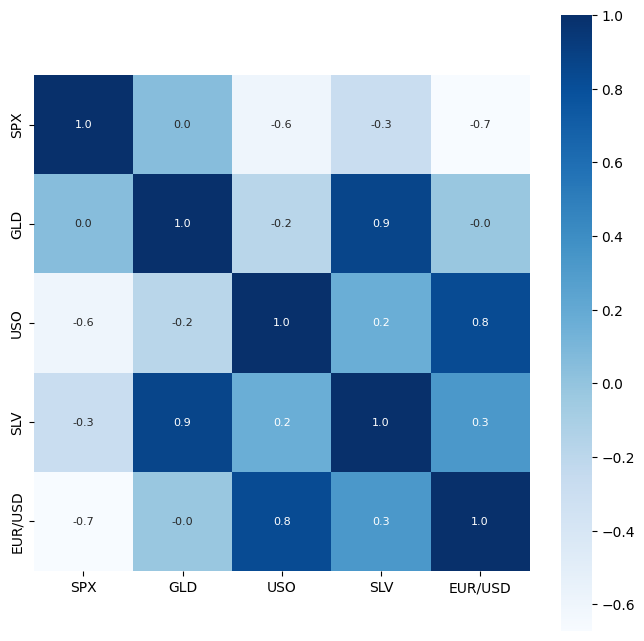

In [ ]:
#constructing a heatmap to understand a correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-4057782040.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

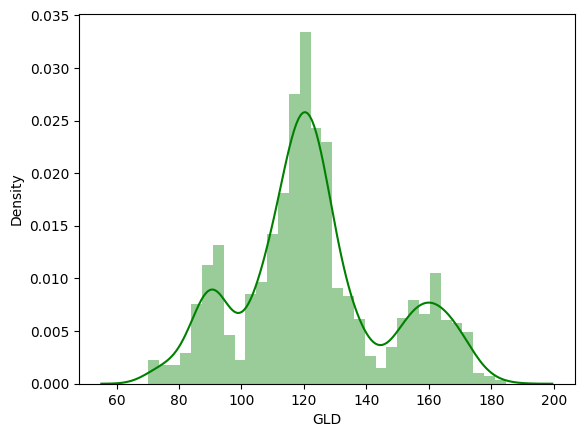

In [ ]:
#check the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

splitting the features and target

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model training:RANDOM FOREST REGRESSSOR

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.51739918  82.04909992 115.71049974 127.53570082 120.78230126
 154.60939845 150.2091984  126.32710002 117.3157989  126.07400053
 116.71640081 171.43210068 140.90719825 167.54519851 115.24559976
 117.64750053 139.2640033  170.23820103 160.00350273 159.91779987
 155.1794999  125.15950029 175.31689951 156.98520328 125.19840032
  93.70699955  77.81940002 120.60960045 119.13429934 167.57429934
  88.0182007  125.33640009  91.05500086 117.75110013 121.04809918
 136.66730128 115.48760127 115.12930089 148.30890002 106.96040101
 104.22670264  87.12109776 126.52960058 117.72909994 152.62359899
 119.5582002  108.32900015 108.2285982   93.14330044 127.00429827
  75.00070024 113.71219946 121.39639992 111.33289917 118.81559887
 120.79699967 159.23730007 167.07010145 147.21989653  85.87309826
  94.42300047  86.80669885  90.56230002 118.97160065 126.3878005
 127.55119991 168.76700065 122.18919938 117.23779895  98.51049994
 167.95920124 142.84329807 132.50820199 121.25600217 121.21319944
 119.859300

In [ ]:
#R-SQUARED ERROR
error_score=metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.9890773107164731


COMPARE THE ACTUAL VALUES AND PREDICTED VALUES IN A PLOT

In [ ]:
Y_test=list(Y_test)

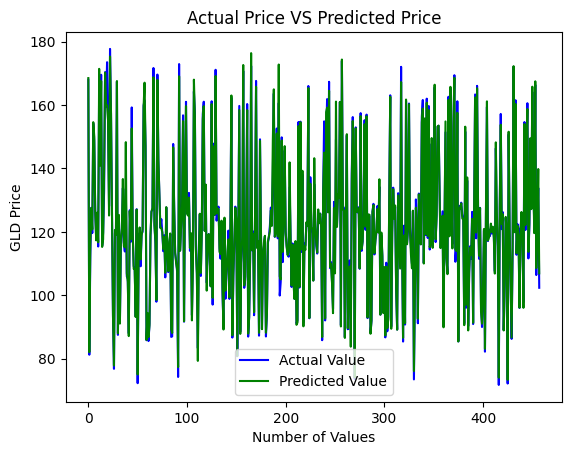

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

